In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
from vary import GaussianVAE
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
from altair import Chart

tf.logging.set_verbosity(tf.logging.INFO)

Using TensorFlow backend.


In [3]:
(X_train, y_train_label), (X_test, y_test_label) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train_label, 10)
y_test = np_utils.to_categorical(y_test_label, 10)

In [3]:
model = GaussianVAE(n_latent_dim=2, n_jobs=-1, n_iter=2)

In [4]:
model.fit(X_train, y_train)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': 123, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10ab9cb10>, '_tf_config': intra_op_parallelism_threads: 8
inter_op_parallelism_threads: 8
gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCom

In [14]:
z_latent = np.vstack(model.transform(X_test))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Loading model from checkpoint: /var/folders/pn/nwp0b4g12916lc2jgd1w28z00000gp/T/tmp8j2Gsb/model.ckpt-3750.


In [15]:
data = pd.DataFrame({'x': z_latent[:, 0], 'y': z_latent[:, 1], 'label': y_test_label})

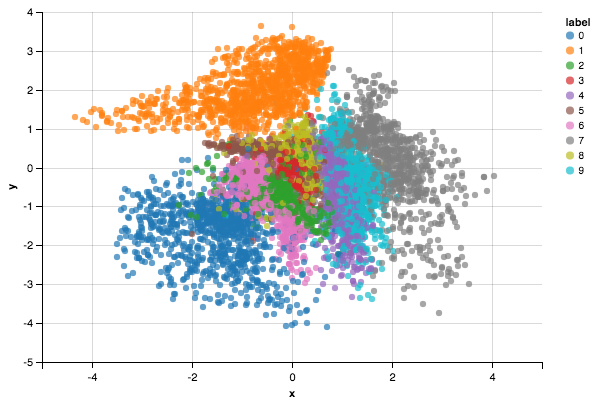

In [16]:
Chart(data).mark_circle().encode(
    x='x',
    y='y',
    color='label:N')

### Householder Flow

In [4]:
model = GaussianVAE(n_latent_dim=2, normalizing_flow='householder', n_jobs=-1, n_iter=2)
model.fit(X_train, y_train)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': 123, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10fb628d0>, '_tf_config': intra_op_parallelism_threads: 8
inter_op_parallelism_threads: 8
gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCom

In [5]:
z_latent = np.vstack(model.transform(X_test))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/joshua/.virtualenv/ds/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Loading model from checkpoint: /var/folders/pn/nwp0b4g12916lc2jgd1w28z00000gp/T/tmpvJOkoC/model.ckpt-3750.


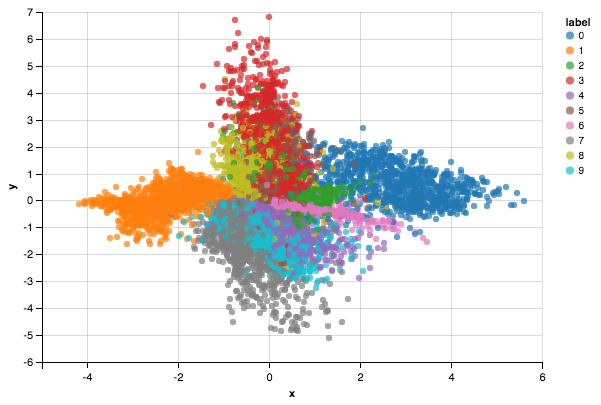

In [6]:
data = pd.DataFrame({'x': z_latent[:, 0], 'y': z_latent[:, 1], 'label': y_test_label})
Chart(data).mark_circle().encode(
    x='x',
    y='y',
    color='label:N')